# Concrete Compressive Strength

## Dataset Description

This dataset contains detailed information about the components of concrete, their respective quantities, and the compressive strength of the concrete 
(This Dataset from Kaggle)

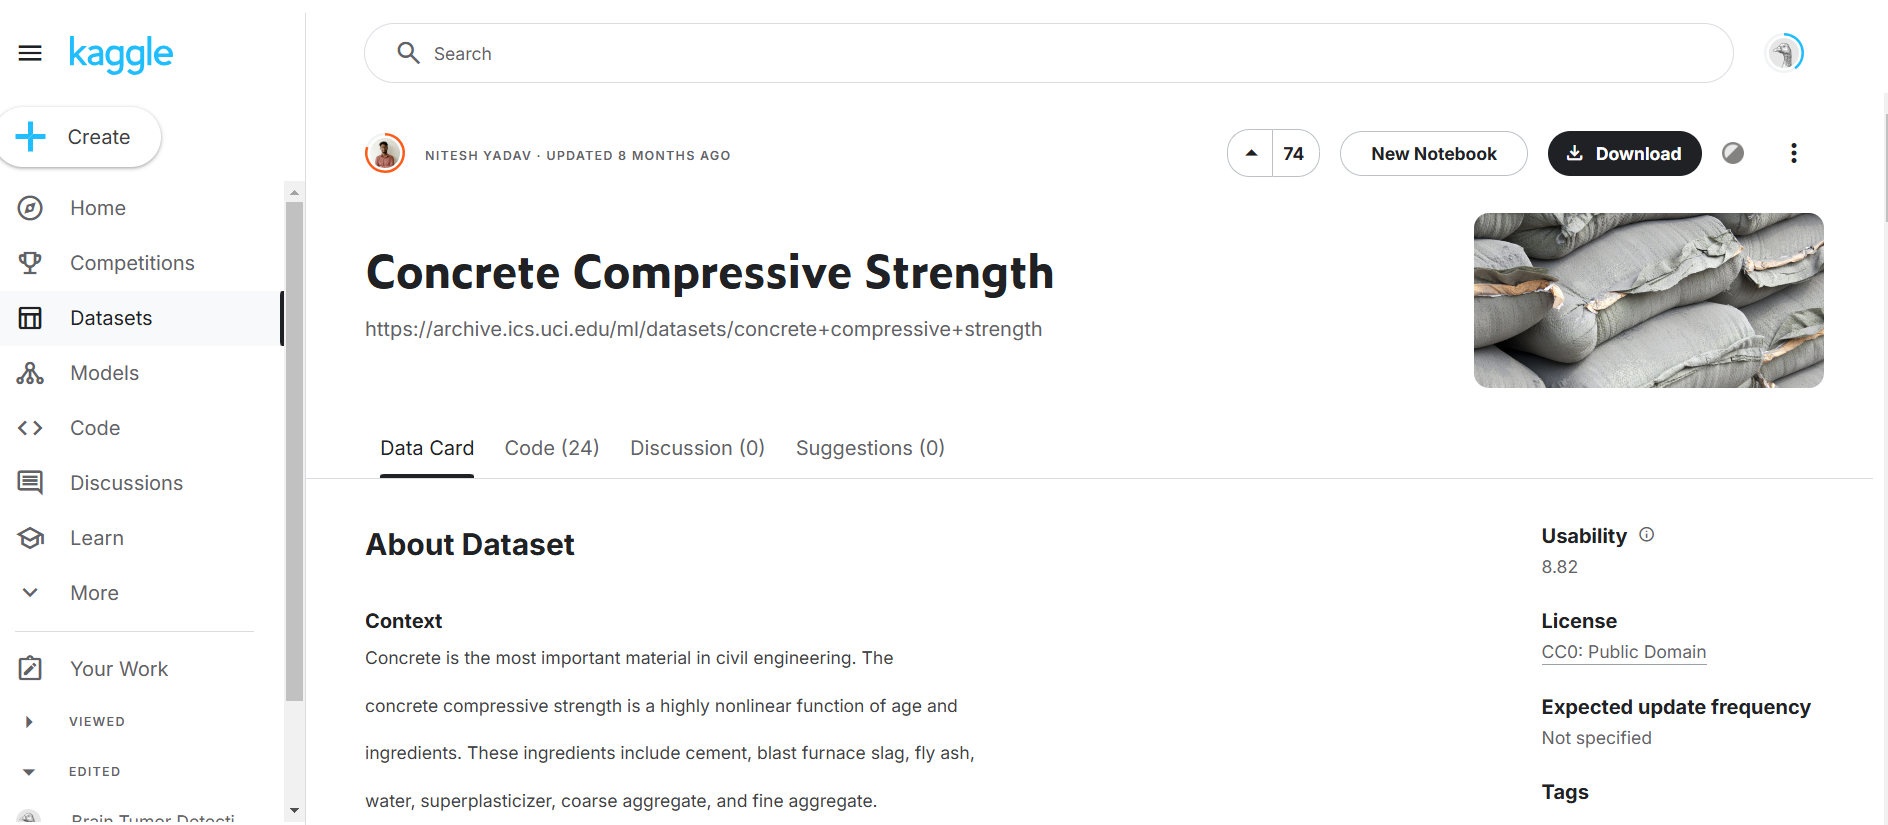

### Features in the Dataset
- **Cement**: Amount of cement used (in kg/m³)
- **Blast Furnace Slag**: Amount of blast furnace slag used (in kg/m³)
- **Fly Ash**: Amount of fly ash used (in kg/m³)
- **Water**: Amount of water used (in kg/m³)
- **Superplasticizer**: Amount of superplasticizer used (in kg/m³)
- **Coarse Aggregate**: Amount of coarse aggregate used (in kg/m³)
- **Fine Aggregate**: Amount of fine aggregate used (in kg/m³)
- **Age (days)**: Number of days the concrete was left to cure

### Target in the Dataset
- **Concrete Compressive Strength**: The final compressive strength of the concrete (in MPa)




---




<center>import libraries</center>

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import joblib
import warnings
warnings.filterwarnings('ignore')

<center>import Dataset</center>

In [47]:
df=pd.read_csv("Concrete compressive strength.csv")
df


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


 <center>Understanding data</center>

In [48]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [49]:
df.columns


Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age (day)',
       'Concrete compressive strength '],
      dtype='object')

In [50]:
df.shape


(1030, 9)

In [51]:
df.columns = df.columns.str.strip()

In [52]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age (day)                      1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [53]:
print("Statistical summary of numeric features:")
df.describe()

Statistical summary of numeric features:


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [54]:
df['Concrete compressive strength'].value_counts()


Concrete compressive strength
33.398217    5
77.297154    4
31.350474    4
71.298713    4
35.301171    4
            ..
56.633559    1
26.048403    1
30.219733    1
16.278528    1
32.401235    1
Name: count, Length: 938, dtype: int64

  <center>Exploratory Data Analysis (EDA) </center>


In [55]:
duplicates = df[df.duplicated()]
print(duplicates)

     Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
77    425.0               106.3      0.0  153.5              16.5   
80    425.0               106.3      0.0  153.5              16.5   
86    362.6               189.0      0.0  164.9              11.6   
88    362.6               189.0      0.0  164.9              11.6   
91    362.6               189.0      0.0  164.9              11.6   
100   425.0               106.3      0.0  153.5              16.5   
103   425.0               106.3      0.0  153.5              16.5   
109   362.6               189.0      0.0  164.9              11.6   
111   362.6               189.0      0.0  164.9              11.6   
123   425.0               106.3      0.0  153.5              16.5   
126   425.0               106.3      0.0  153.5              16.5   
132   362.6               189.0      0.0  164.9              11.6   
134   362.6               189.0      0.0  164.9              11.6   
137   362.6               189.0   

In [56]:
num_duplicates = df.duplicated().sum()
print(f'Number of duplicate rows: {num_duplicates}')

Number of duplicate rows: 25


In [57]:
df = df.drop_duplicates()

In [58]:
df.shape

(1005, 9)

In [59]:
df.isnull().any()

Cement                           False
Blast Furnace Slag               False
Fly Ash                          False
Water                            False
Superplasticizer                 False
Coarse Aggregate                 False
Fine Aggregate                   False
Age (day)                        False
Concrete compressive strength    False
dtype: bool

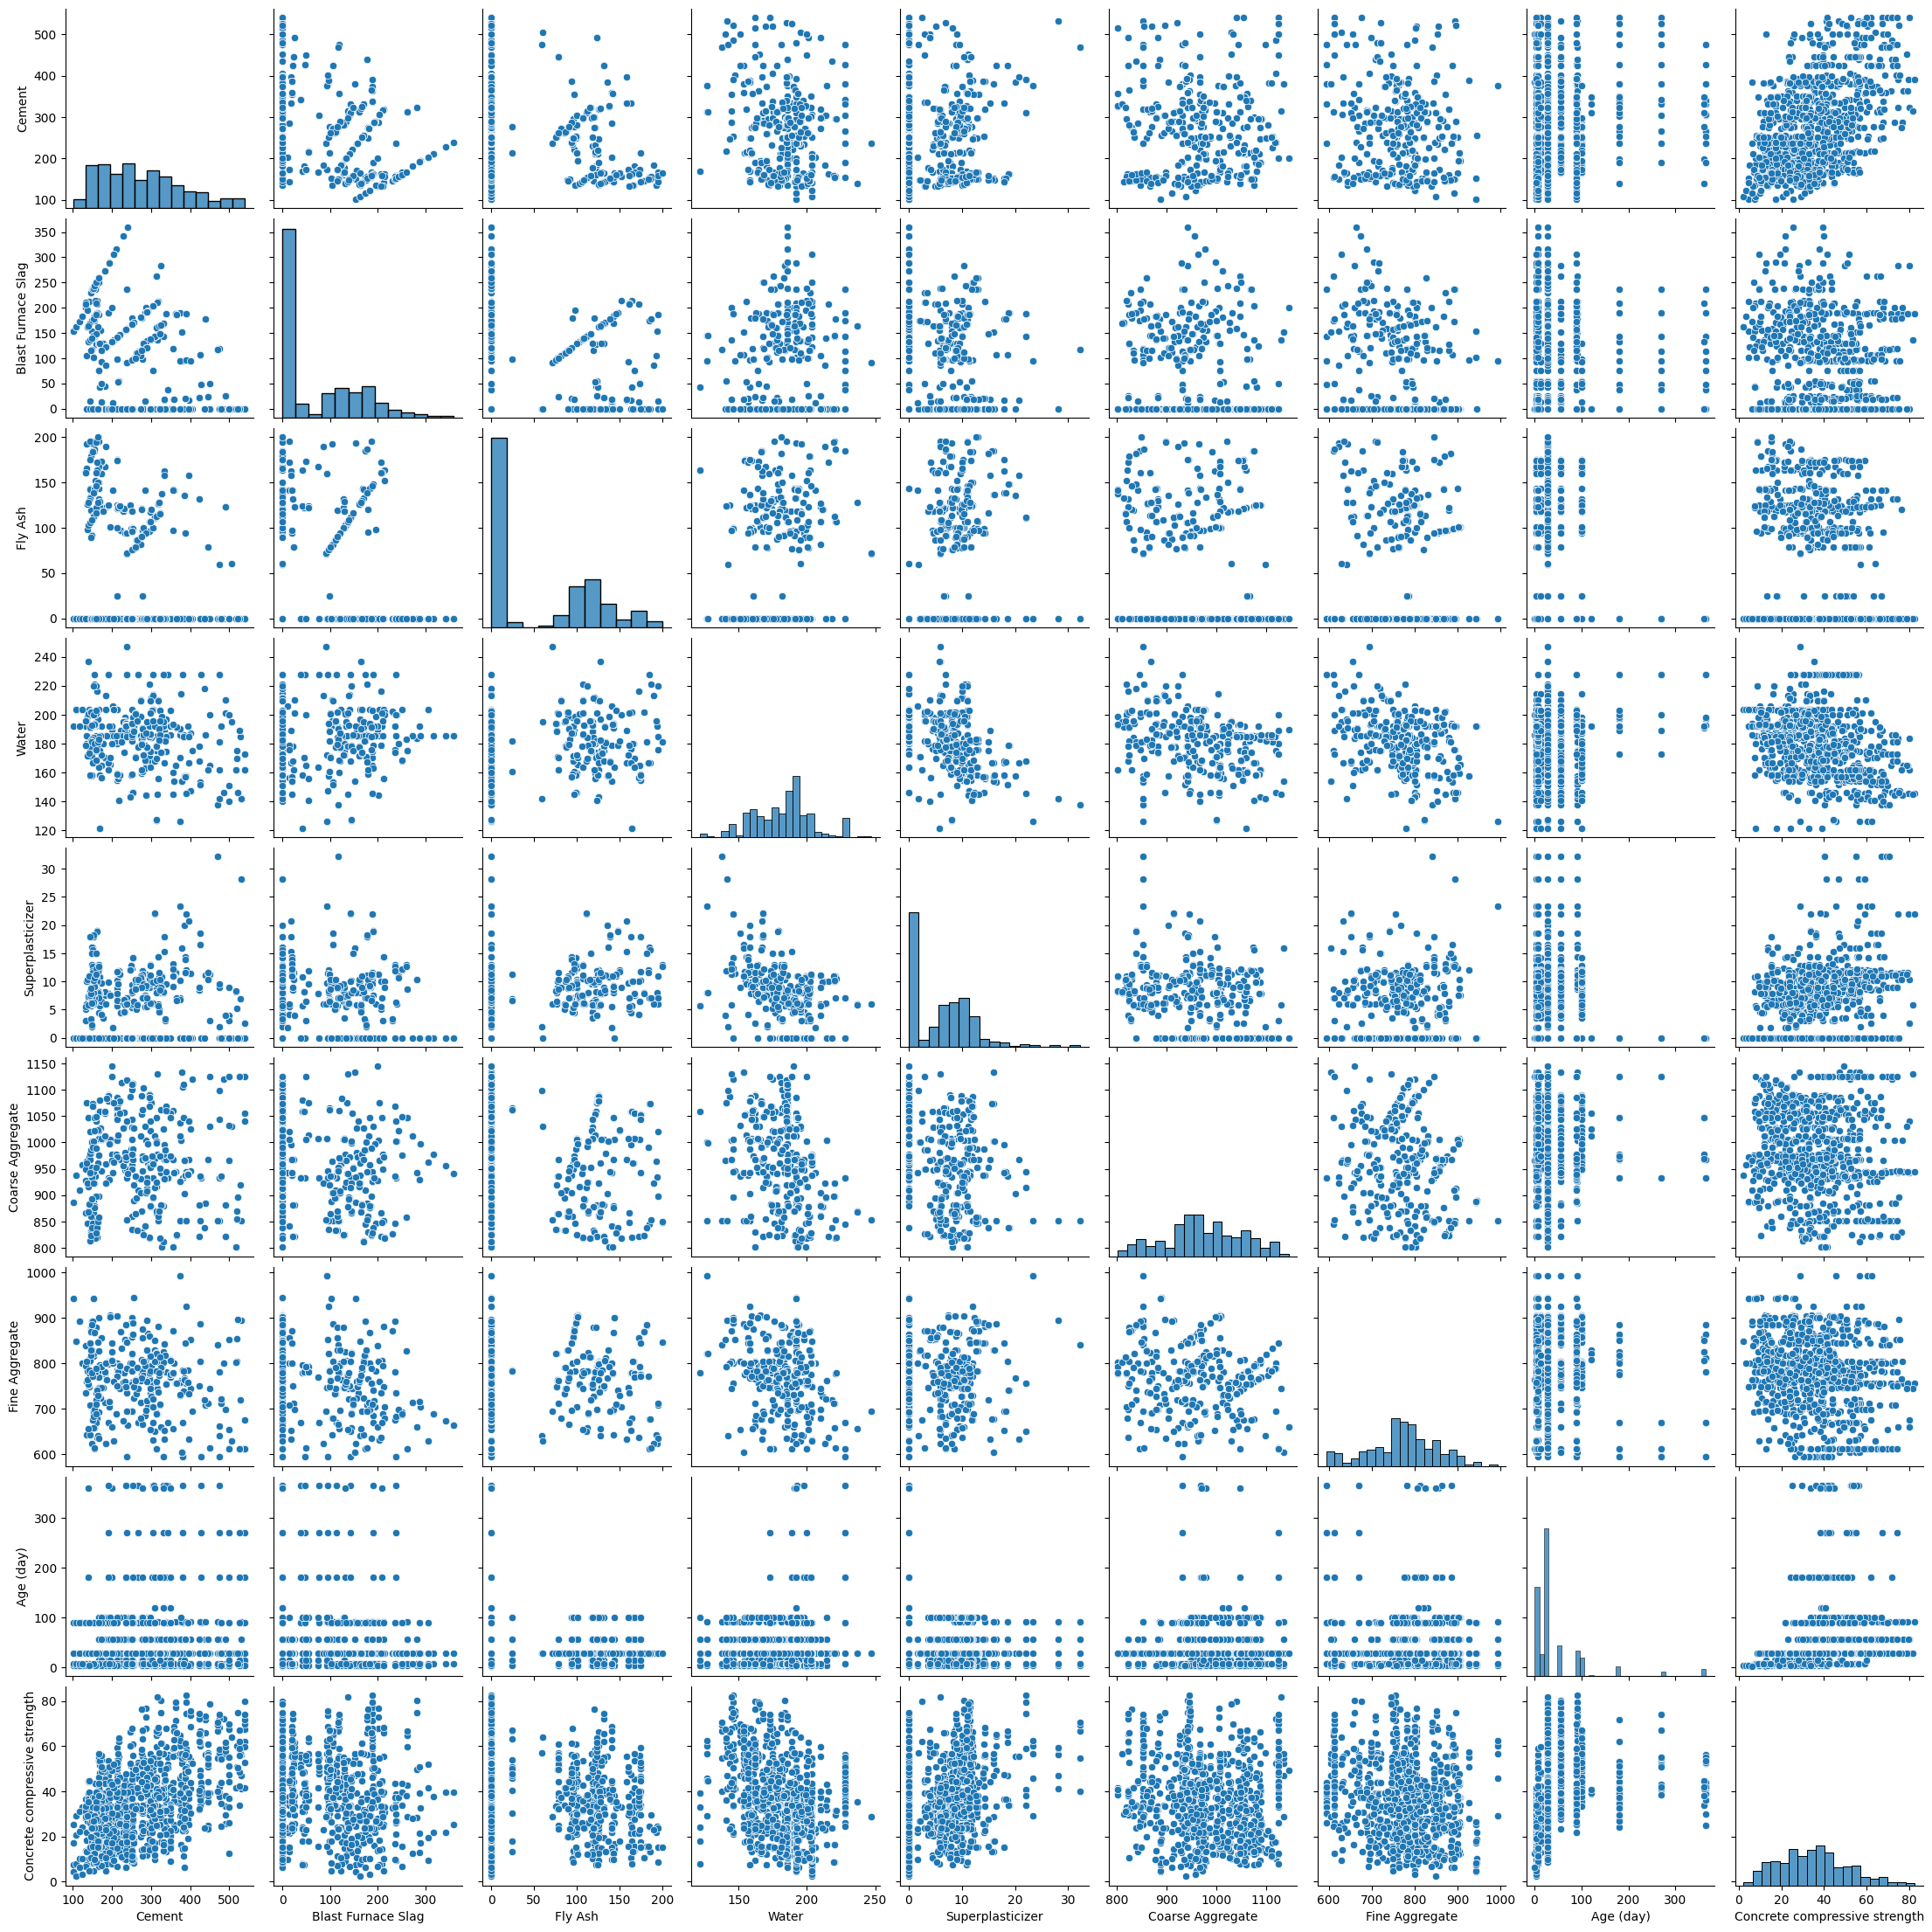

In [60]:
sns.pairplot(df)
plt.show()

In [61]:
data = df['Concrete compressive strength'].tolist()
fig = go.Figure(go.Histogram(x=data, nbinsx=10, marker_color='#204f6b'))
fig.update_layout(title='Histogram of Strength',xaxis_title='Strength Values',yaxis_title='Frequency')
fig.show()

Index([], dtype='object')


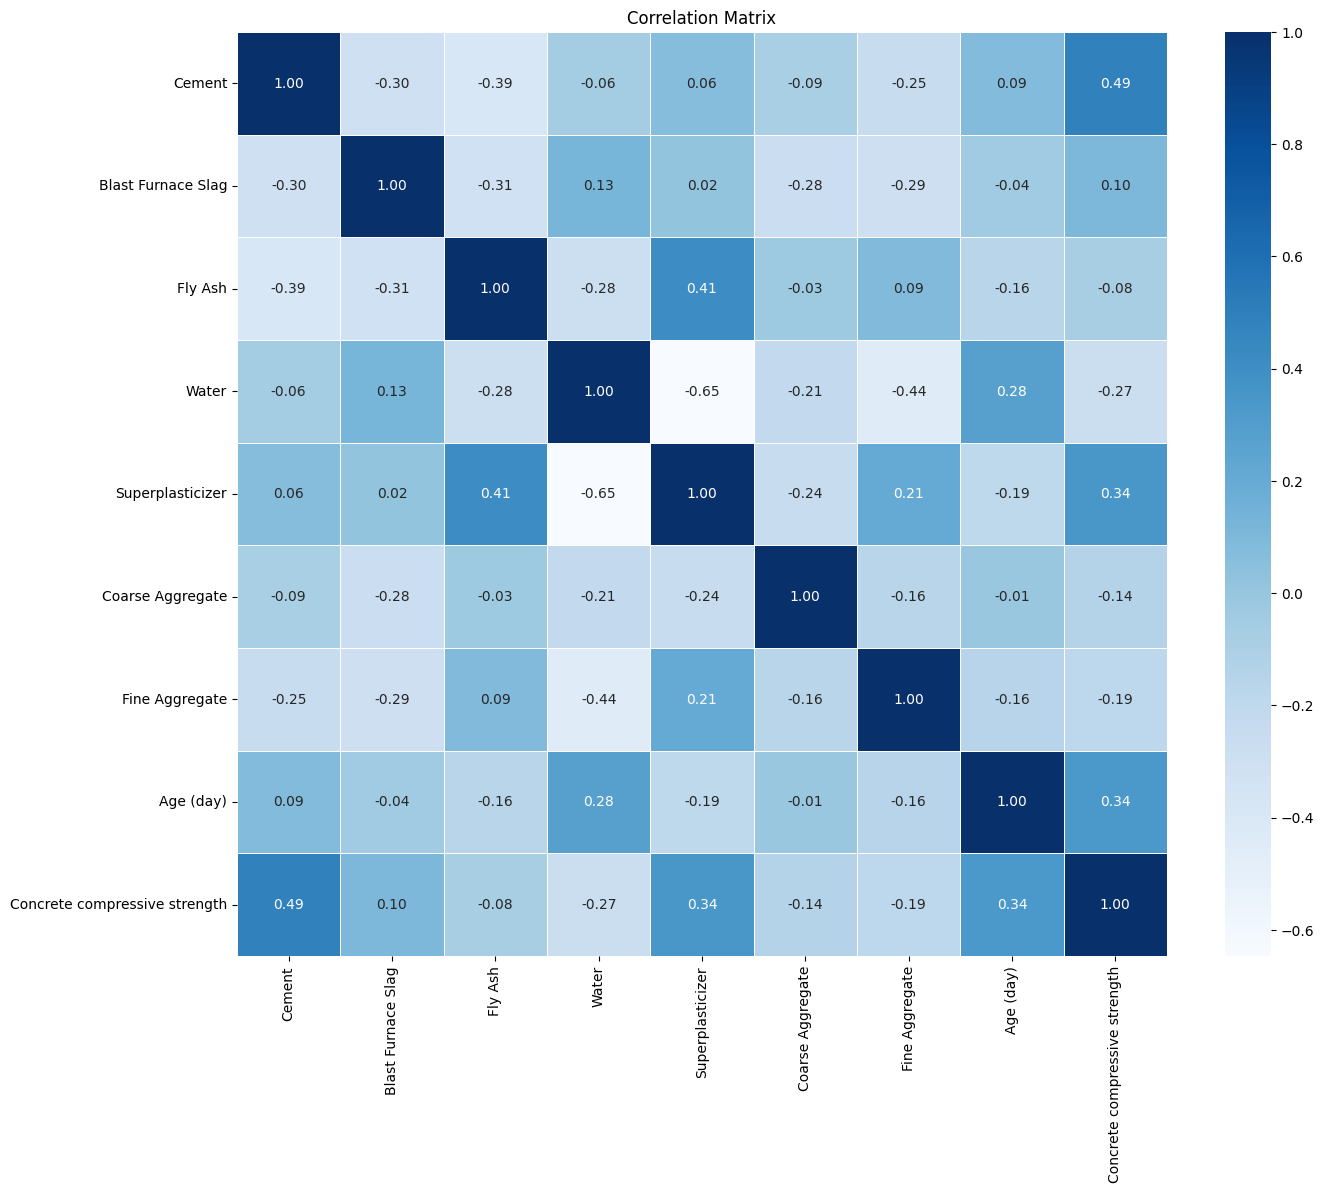

In [62]:
interval_cols = df.select_dtypes(include='interval').columns
print(interval_cols)
num_cols = df.select_dtypes(include=['number']).columns
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix,annot=True,cmap="Blues",fmt=".2f",linewidths=0.5,)
plt.title('Correlation Matrix')
plt.show()

  <center>Data Cleaning </center>


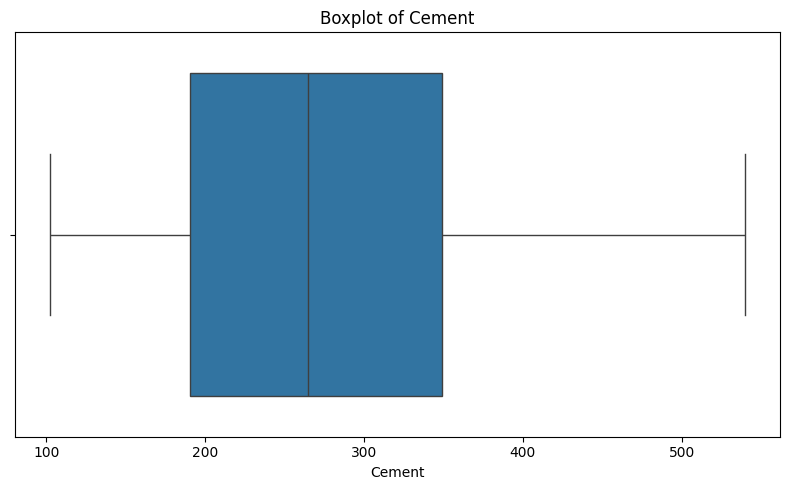

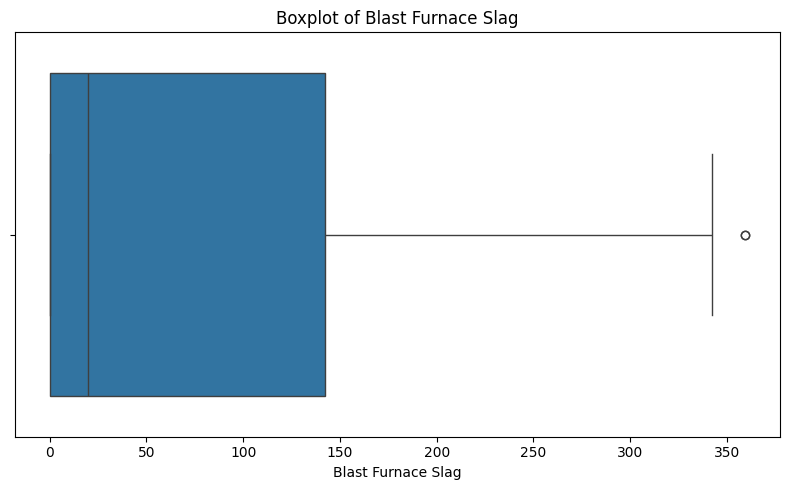

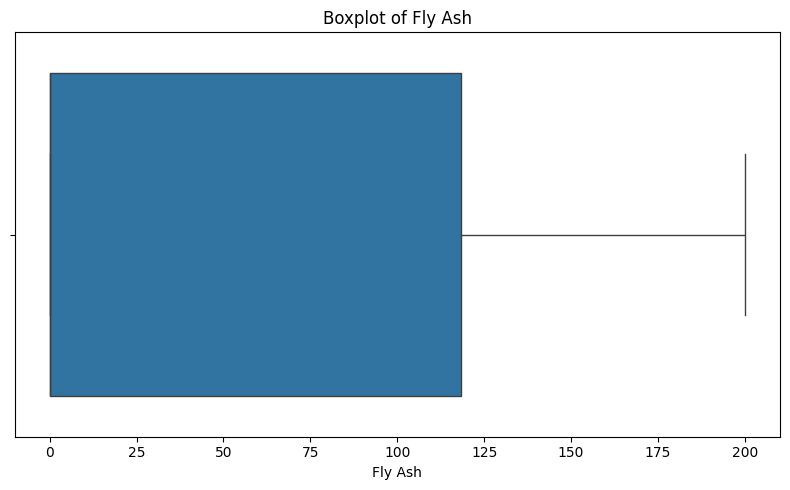

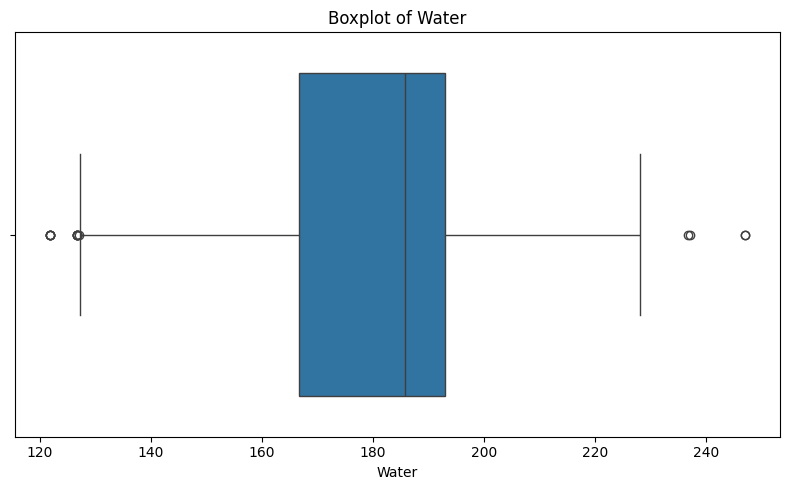

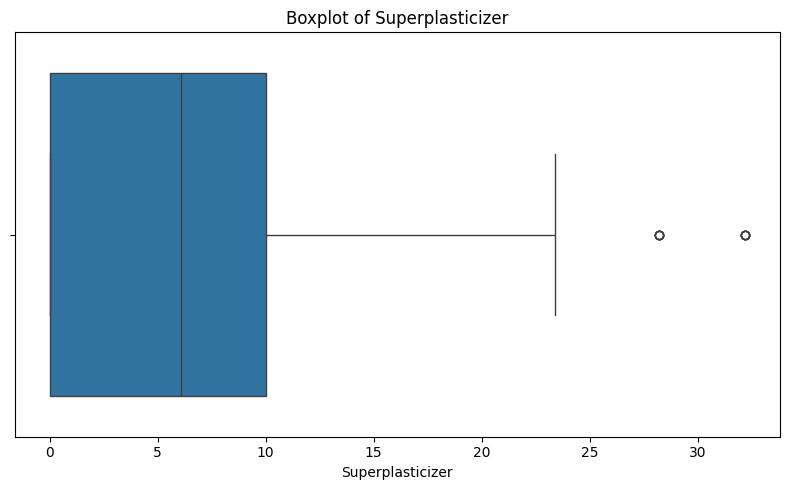

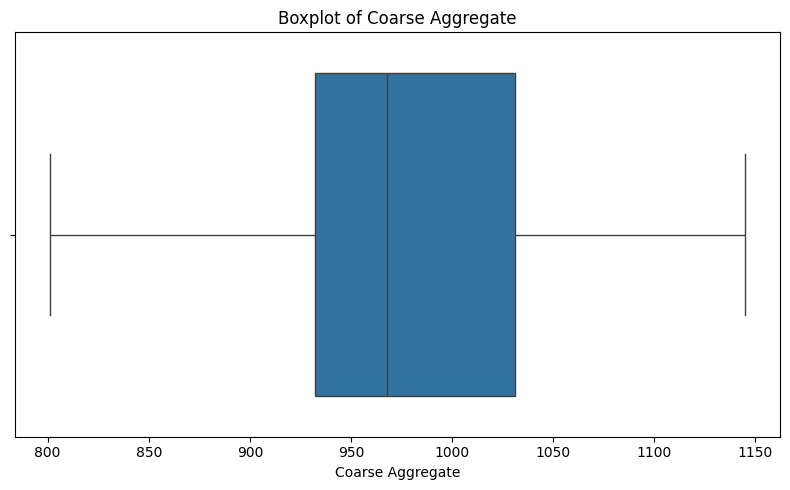

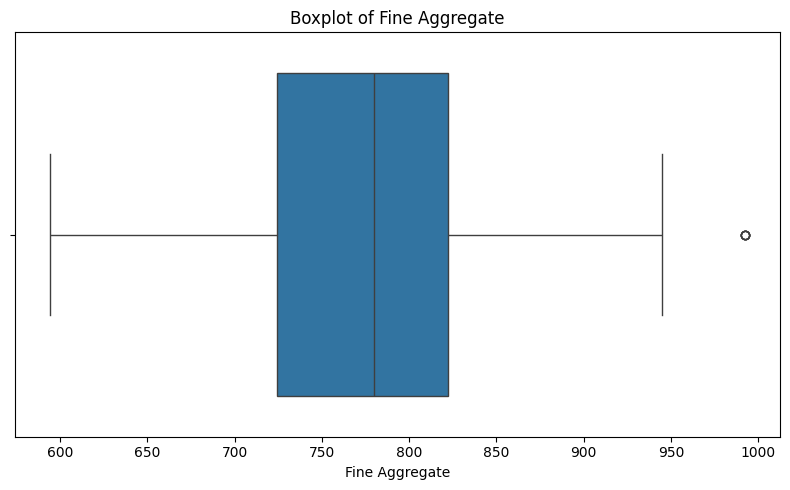

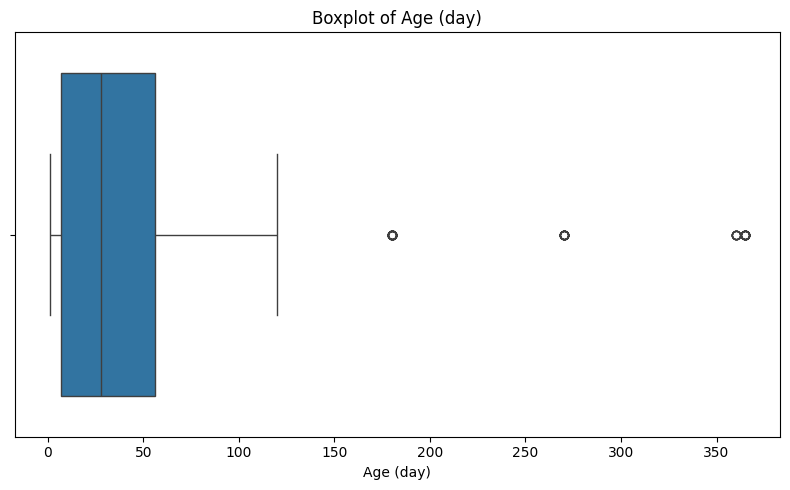

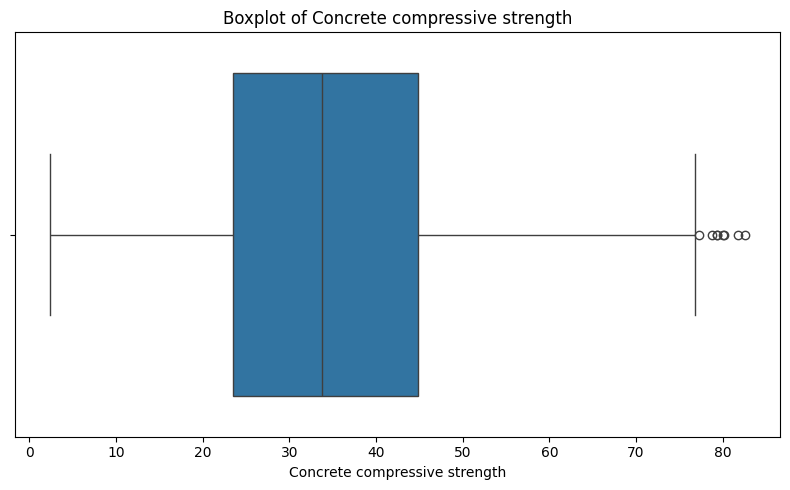

In [63]:
for col in df.columns:
    plt.figure(figsize=(8, 5))  
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()


In [64]:
outlier_cols = [ 'Blast Furnace Slag', 'Water', 'Superplasticizer', 'Fine Aggregate']
for col in outlier_cols:
    df[col] = np.log10(df[col] + 1)

# **Modeling by Machine Learning**

In [65]:
scaler = StandardScaler()

In [66]:
X =df.drop(columns=['Concrete compressive strength'])  
y = df['Concrete compressive strength']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Using LinearRegression**

In [69]:
model = LinearRegression()

In [70]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [71]:
y_pred = model.predict(X_test_scaled )

In [72]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 8.683121870900775
Root Mean Squared Error (RMSE): 11.008716887022368
R² Score: 0.5937632978451237


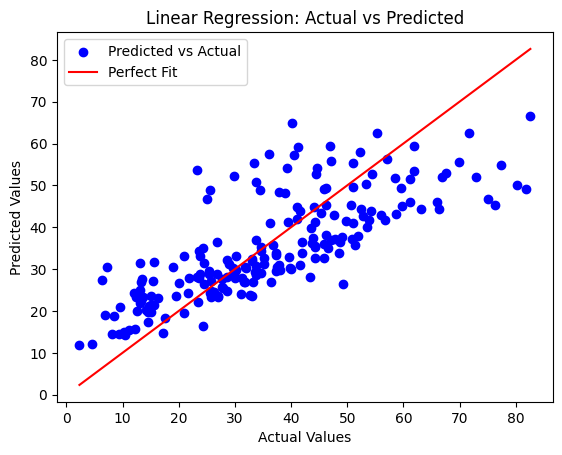

In [73]:
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')  
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Fit')  
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# **using RandomForestRegressor**


In [74]:
model1 = RandomForestRegressor(random_state=42, n_estimators=100)
model1.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [77]:
y_pred = model1.predict(X_test_scaled)

In [78]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 3.4411994078218746
Root Mean Squared Error (RMSE): 5.161319363514516
R² Score: 0.910704984552392


# **Using XGBRegressor**

In [79]:
x_model=XGBRegressor()

In [80]:
x_model.fit(X_train_scaled,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [81]:
y_pred=x_model.predict(X_test_scaled)

In [82]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 2.738200859575628
Root Mean Squared Error (RMSE): 4.5383402559952515
R² Score: 0.9309601468942102


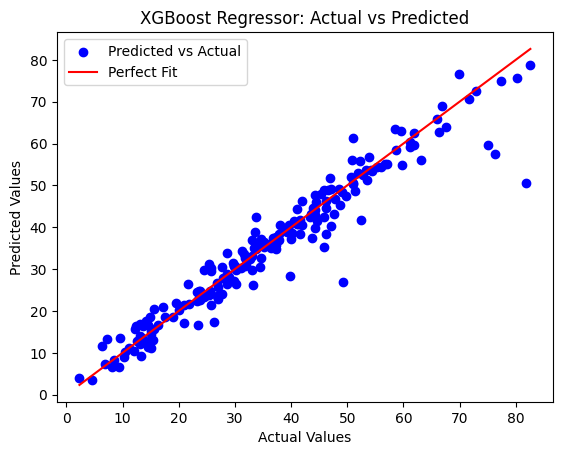

In [84]:
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual') 
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Fit')  
plt.title('XGBoost Regressor: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# **Using GradientBoostingRegressor & Grid Search**


In [85]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

In [86]:
gr_model = GradientBoostingRegressor()

In [87]:
grid_search = GridSearchCV(estimator=gr_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

In [88]:
grid_search.fit(X_train_scaled , y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [89]:
print("best parameters:", grid_search.best_params_)

best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [90]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

In [91]:
rmse_best = mean_squared_error(y_test, y_pred_best, squared=False)
r2_best = r2_score(y_test, y_pred_best)
print(f"Best RMSE: {rmse_best}")
print(f"Best R²: {r2_best}")

Best RMSE: 4.297186566907905
Best R²: 0.9381023486060746


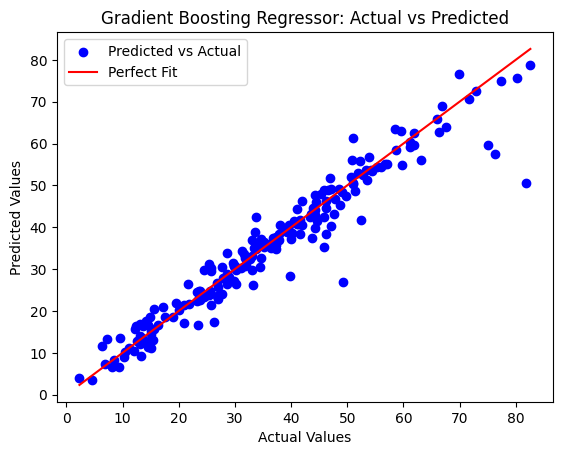

In [92]:
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual') 
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Fit')  
plt.title('Gradient Boosting Regressor: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [93]:
print("Expected number of features:", best_model.n_features_in_)


Expected number of features: 8


In [94]:

new_data = [
    [540, 162, 2.5, 1040, 676, 28, 10, 25], 
    [610, 150, 1.5, 900, 720, 14, 5, 20]     
]

new_data_array = np.array(new_data)

new_predictions = best_model.predict(new_data_array)
print("Predictions for new data:", new_predictions)

Predictions for new data: [57.83812768 63.53338885]


# save best model 

In [80]:
import pickle
pickle.dump(best_model,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))